# **2장. 머신러닝의 기초 모델 이해하기 — 회귀와 분류**

## **2-1절. 모든 모델의 기반 — 선형 회귀 모델**

📌[실습 02-01] 라이브러리 불러오기

In [ ]:
!pip install koreanize_matplotlib
import koreanize_matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.3 MB/s eta 0:00:00


📌[실습 02-02] 데이터 불러오기

In [ ]:
df=pd.read_csv("베이스볼.csv", encoding='cp949')
df

,max_speed,fourball,strikeout,era,hand
0,158,5,7,3.37,right
1,149,5,4,3.01,left
2,153,7,0,3.83,right
3,136,5,6,3.44,right
4,140,7,4,4.16,right
...,...,...,...,...,...
95,144,5,7,2.71,right
96,151,5,3,3.64,left
97,164,4,3,3.73,right
98,148,7,2,3.98,right


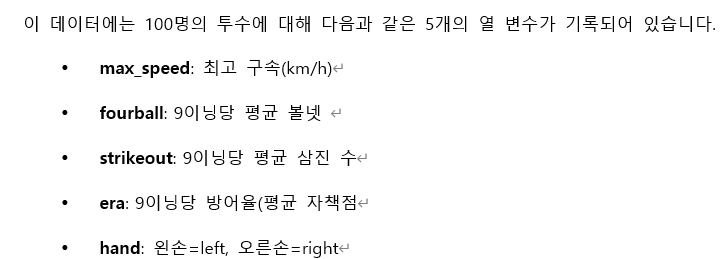

### 탐색적 데이터분석

📌[실습 02-03] 기초 통계 확인하기

In [ ]:
df.describe()

,max_speed,fourball,strikeout,era
count,100.00000,100.000000,100.000000,100.000000
mean,150.30000,3.700000,4.840000,3.078000
std,8.88251,2.388948,3.073905,0.707328
min,135.00000,0.000000,0.000000,1.670000
25%,144.00000,2.000000,2.000000,2.515000
50%,152.00000,4.000000,5.000000,3.055000
75%,157.00000,6.000000,8.000000,3.577500
max,165.00000,7.000000,10.000000,5.010000


📌[실습 02-04] 산점도와 추세선으로 변수간의 관계 시각화하기시각화하기

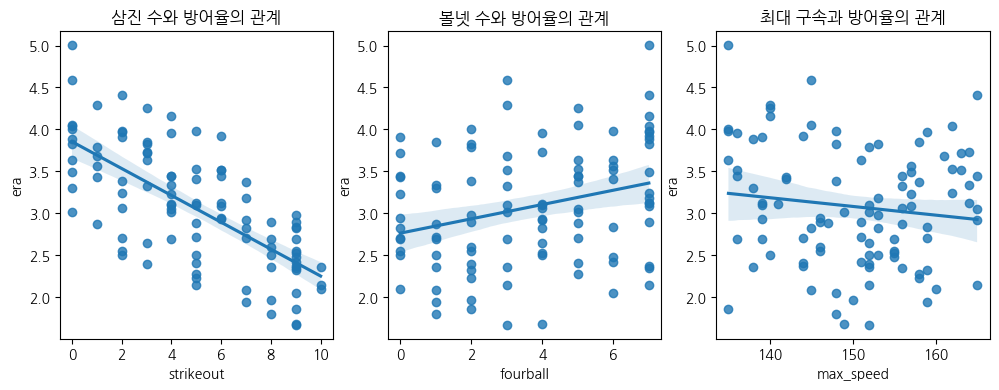

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
sns.regplot(x='strikeout', y='era', data=df)
plt.title("삼진 수와 방어율의 관계")

plt.subplot(1,3,2)
sns.regplot(x='fourball', y='era', data=df)
plt.title("볼넷 수와 방어율의 관계")

plt.subplot(1,3,3)
sns.regplot(x='max_speed', y='era', data=df)
plt.title("최대 구속과 방어율의 관계")
plt.show()

### 넘파이 배열 이해하기  

📌[실습 02-05] 1차원 넘파이 배열 만들기

In [ ]:
import numpy as np    # 넘파이 라이브러리 불러오기
a=np.array([1, 2, 3])    # 단일 리스트로 배열 생성
print("1D array=", a); print()
print("차원 수:", a.ndim)
print("형태:", a.shape)
print("자료 유형:", type(a))
print("0번 인덱스의 값=", a[0])    # 인덱싱 방법
print("합계=", a.sum())


1D array= [1 2 3]

차원 수: 1
형태: (3,)
자료 유형: <class 'numpy.ndarray'>
0번 인덱스의 값= 1
합계= 6


📌[실습 02-06] 2차원 넘파이 배열 만들기

In [ ]:
b=np.array([[1, 2],
            [3, 4],
            [5, 6]])
print("2D array="); print(b); print()

print("차원 수:", b.ndim)
print("형태:", b.shape)
print("2번 행, 1번 열의 값=", b[2,1  ])    # 행렬 인덱싱 방법
print("합계=", b.sum()); print()

print(b.reshape(2,3))    # 행과 열 구조 변경
print()
print(b.flatten())        # 행과 열 구조 변경


2D array=
[[1 2]
 [3 4]
 [5 6]]

차원 수: 2
형태: (3, 2)
2번 행, 1번 열의 값= 6
합계= 21

[[1 2 3]
 [4 5 6]]

[1 2 3 4 5 6]


📌[실습 02-07] 3차원 넘파이 배열 만들기

In [ ]:
c=np.array([[ [1,  1.5], [2,2.5]],
             [[3, 3.5], [4,4.5]],
             [[5, 5.5], [6, 6.5] ]])
print("3D array="); print(c); print()

print("차원 수:", c.ndim)
print("형태:", c.shape); print()

print("모든 행, 모든 열의 0번 채널 값 =")
print(c[:, : ,0])    # 3차원 인덱싱 방법
print()
print("flatten 결과 => ", c.flatten())    # 1차원으로 변경


3D array=
[[[1.  1.5]
  [2.  2.5]]

 [[3.  3.5]
  [4.  4.5]]

 [[5.  5.5]
  [6.  6.5]]]

차원 수: 3
형태: (3, 2, 2)

모든 행, 모든 열의 0번 채널 값 =
[[1. 2.]
 [3. 4.]
 [5. 6.]]

flatten 결과 =>  [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5]


## 회귀 모델 설정하기

📌[실습 02-08] 타깃과 피처 지정하기

In [ ]:
y=df['era']           # 타겟
X=df[['strikeout']]   # 피쳐,이중 브래킷 주의 (2차원 배열이어야 함)
X.head()

,strikeout
0,7
1,4
2,0
3,6
4,4


📌[실습 02-09] 임의의 파라미터로 예측해 보기

In [ ]:
w=-0.5; b=5
df['pred_era']=w*X+b
df['error']=df['era']-df['pred_era']
df

,max_speed,fourball,strikeout,era,hand,pred_era,error
0,158,5,7,3.37,right,1.5,1.87
1,149,5,4,3.01,left,3.0,0.01
2,153,7,0,3.83,right,5.0,-1.17
3,136,5,6,3.44,right,2.0,1.44
4,140,7,4,4.16,right,3.0,1.16
...,...,...,...,...,...,...,...
95,144,5,7,2.71,right,1.5,1.21
96,151,5,3,3.64,left,3.5,0.14
97,164,4,3,3.73,right,3.5,0.23
98,148,7,2,3.98,right,4.0,-0.02


📌[실습 02-10] 예측 결과 시각화하기

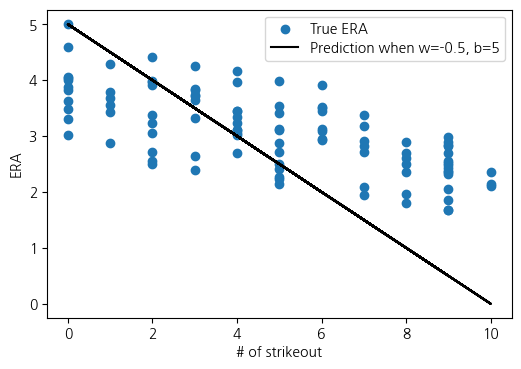

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["strikeout"], df["era"], label="True ERA")
plt.plot(df["strikeout"], df["pred_era"],"k-", label=f'Prediction when w={w}, b={b}')
plt.xlabel("# of strikeout")
plt.ylabel("ERA")
plt.legend()
plt.show()

📌[실습 02-11] 예측 오차를 숫자로 평가하기

In [ ]:
MSE=np.mean(df['error']**2)
print('평균 제곱오차=', np.round(MSE,3))

평균 제곱오차= 1.582


📌[실습 02-12] 평균제곱오차를 계산하는 함수 만들기

In [ ]:
def mse(true, pred):           # 함수 정의
  q=np.mean((true-pred)**2)    # 규칙 연산
  return q                     # 결과 반환

z=mse(y,df['pred_era']) # 함수 호출: 타깃의 참값과 예측값을 입력
print(f"mse 함수로 계산한 평균 제곱오차={z: .3f}")  # f-스트링 기법으로 MSE 출력

mse 함수로 계산한 평균 제곱오차= 1.582


📌[실습 02-13] 예측 결과와 평균제곱오차 손실값 시각화하기

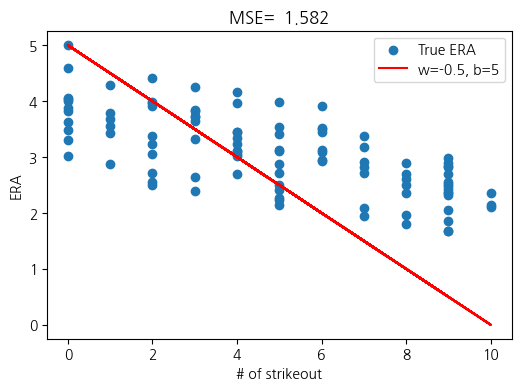

In [ ]:
plt.figure(figsize=(6, 4))

MSE=np.mean(df['error']**2)  # 또는 mse 함수 사용 가능

plt.scatter(df["strikeout"], df["era"], label="True ERA")
plt.plot(df["strikeout"], df["pred_era"],"r", label=f'w={w}, b={b}')
plt.xlabel("# of strikeout")
plt.ylabel("ERA")
plt.legend()
plt.title(f"MSE= {MSE: .3f}") # f_string (문자와 변수 결합)
plt.show()

파라미터 변경해서 반복해 보기

In [ ]:
w=-0.3; b=5

df['pred_era']=w*X+b
df['error']=df['era']-df['pred_era']
df

,max_speed,fourball,strikeout,era,hand,pred_era,error
0,158,5,7,3.37,right,2.9,0.47
1,149,5,4,3.01,left,3.8,-0.79
2,153,7,0,3.83,right,5.0,-1.17
3,136,5,6,3.44,right,3.2,0.24
4,140,7,4,4.16,right,3.8,0.36
...,...,...,...,...,...,...,...
95,144,5,7,2.71,right,2.9,-0.19
96,151,5,3,3.64,left,4.1,-0.46
97,164,4,3,3.73,right,4.1,-0.37
98,148,7,2,3.98,right,4.4,-0.42


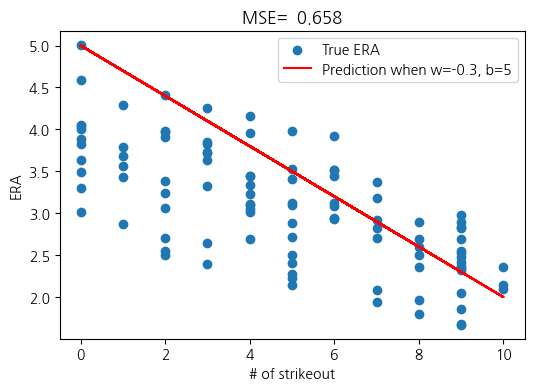

In [ ]:
plt.figure(figsize=(6, 4))

MSE=np.mean(df['error']**2)

plt.scatter(df["strikeout"], df["era"], label="True ERA")
plt.plot(df["strikeout"], df["pred_era"],"r", label=f'Prediction when w={w}, b={b}')
plt.xlabel("# of strikeout")
plt.ylabel("ERA")
plt.legend()
plt.title(f"MSE= {MSE: .3f}") # f_string (문자와 변수 결합)
plt.show()

책에 있는 그림 만들기


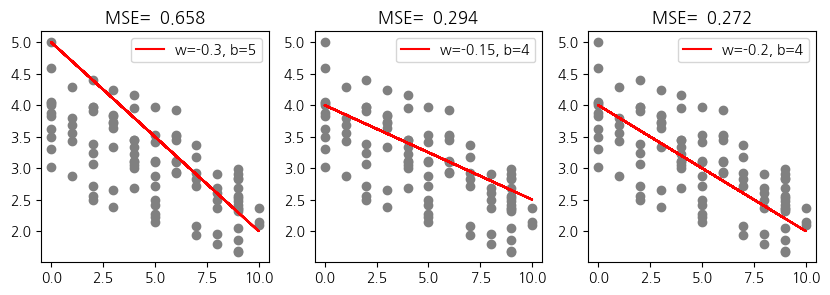

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
w=-0.3; b=5
df['pred_era']=w*X+b; df['error']=df['era']-df['pred_era'] ; MSE=np.mean(df['error']**2)
plt.scatter(df["strikeout"], df["era"], color='gray')
plt.plot(df["strikeout"], df["pred_era"],"r", label=f'w={w}, b={b}')
plt.title(f"MSE= {MSE: .3f}")
plt.legend()

plt.subplot(1,3,2)
w=-0.15; b=4
df['pred_era']=w*X+b; df['error']=df['era']-df['pred_era'] ; MSE=np.mean(df['error']**2)

plt.scatter(df["strikeout"], df["era"], color='gray')
plt.plot(df["strikeout"], df["pred_era"],"r", label=f'w={w}, b={b}')
plt.title(f"MSE= {MSE: .3f}")
plt.legend()

plt.subplot(1,3,3)
w=-0.2; b=4
df['pred_era']=w*X+b; df['error']=df['era']-df['pred_era'] ; MSE=np.mean(df['error']**2)

plt.scatter(df["strikeout"], df["era"], color='gray')
plt.plot(df["strikeout"], df["pred_era"],"r", label=f'w={w}, b={b}')
plt.title(f"MSE= {MSE: .3f}")
plt.legend()
plt.show()

📌[실습 02-14] 최적의 파라미터 찾기

In [ ]:
y=df['era']
X=df[['strikeout']]  # 피쳐 1개

from sklearn.linear_model import LinearRegression  # 클래스: 모델 객체의 설계도
model=LinearRegression()                           # 모델 인스턴스
model.fit(X, y)                                    # 모델 학습

LinearRegression()

📌[실습 02-15] 최적 파라미터 확인하기



In [ ]:
print("가중치(weights)=", model.coef_)  # 객체 속성
print("편향(bias)=", model.intercept_)

가중치(weights)= [-0.15720595  0.07475011 -0.00907497]
편향(bias)= 4.926268916009339


### 학습된 회귀 모델로 예측하기

📌[실습 02-16] 회귀 모델로 타깃의 예측값 계산하기

In [ ]:
y_pred=model.predict(X) # 메서드: 피쳐 X를 입력하여 모델의 예측값 계산
print(y_pred[:10])
print(type(y_pred))


[2.76573303 3.3190256  4.06104976 3.12258825 3.55020051 3.85064863
 3.53224365 3.98414928 3.97937506 3.1030691 ]
<class 'numpy.ndarray'>


📌[실습 02-17] 회귀 모델의 최종 손실값 계산하기(사용자 정의 함수)

In [ ]:
MSE=mse(y,y_pred)  # 사용자 정의함수 호출
print(f"평균 제곱오차= {MSE: .4f}")

평균 제곱오차=  0.2161


📌[실습 02-18] 회귀 모델의 최종 손실값 계산하기(라이브러리 함수)

In [ ]:
mean_squared_error(y, y_pred) # MSE 를 구해주는 함수

0.21609621157270492

📌[실습 02-19] 회귀 모델의 예측 성능 시각화하기

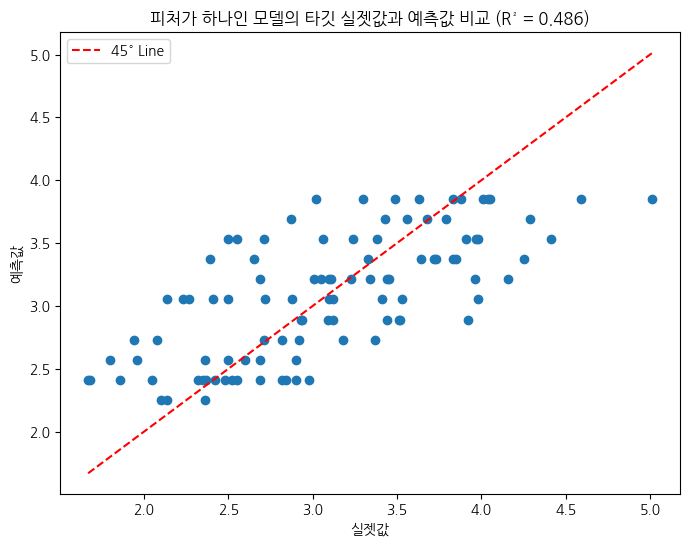

In [ ]:
y_pred=model.predict(X)

from sklearn.metrics import mean_squared_error, r2_score
acc = r2_score(y, y_pred)  # R²예측력 계산

# 예측값과 실제값 비교 그림 (45도 일치선 방법)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='45° Line')

plt.title(f'피처가 하나인 모델의 타깃 실젯값과 예측값 비교 (R² = {acc:.3f})')
plt.xlabel('실젯값')
plt.ylabel('예측값')
plt.legend()
plt.show()

### 회귀 모델 개선하기

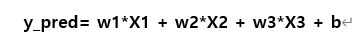

📌[실습 02-20] 피처 3개로 회귀 모델 학습하기

In [ ]:
y=df['era']
X=df[['strikeout', 'fourball', 'max_speed']]  # 피쳐 3개

from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(X, y)

print("가중치(weights)=", model2.coef_)
print("편향 (bias)=", model2.intercept_); print()

y_pred=model2.predict(X) # 피쳐 X를 사용하여 모형의 예측값 계산
MSE=mean_squared_error(y, y_pred)
print("MSE 손실=", MSE)

가중치(weights)= [-0.15720595  0.07475011 -0.00907497]
편향 (bias)= 4.926268916009339

MSE 손실= 0.21609621157270492


회귀 모델의 예측 정확도 시각화하기

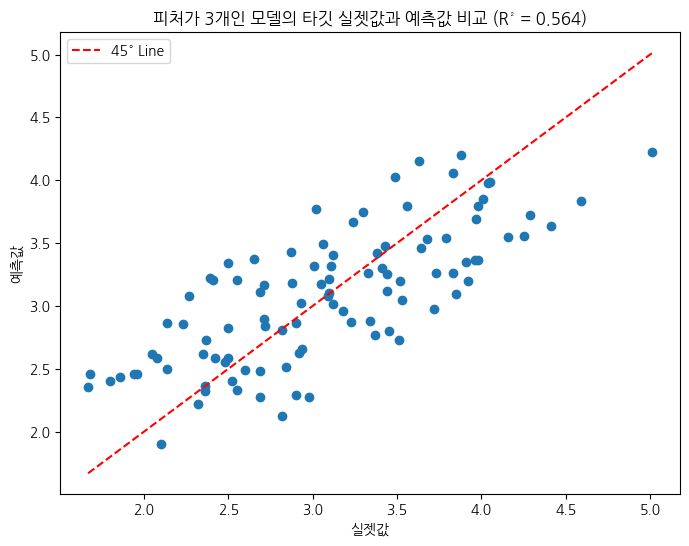

In [ ]:
y_pred=model2.predict(X)  # 모델 이름 확인

from sklearn.metrics import mean_squared_error, r2_score
acc = r2_score(y, y_pred)  # R²예측력 계산

# 예측값과 실제값 비교 그림 (45도 일치선 방법)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='45° Line')

plt.title(f'피처가 3개인 모델의 타깃 실젯값과 예측값 비교 (R² = {acc:.3f})')
plt.xlabel('실젯값')
plt.ylabel('예측값')
plt.legend()
plt.show()

📌[실습 02-21] 회귀 모델로 예측해보기

In [ ]:
import warnings
warnings.filterwarnings('ignore')

X_new=[[10, 0, 160]]  # 특성 3개 (삼진, 볼넷, 최고구속)
print(f"이 투수의 방어율은 {model2.predict(X_new)}로 예측됩니다.")

이 투수의 방어율은 [1.90221471]로 예측됩니다.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

X_new=[[11, 0, 160]]  # 특성 3개 (삼진, 볼넷, 최고구속)
print(f"이 투수의 방어율은 {model2.predict(X_new)}로 예측됩니다.")

이 투수의 방어율은 [1.74500876]로 예측됩니다.


#### **복습: 선형 회귀모델 가중치의 의미를 정확하게 이해합시다**
- 다른 모든 피쳐가 동일할때, 한 피쳐가 1만큼 증가할때 타깃의 변화 예측

In [ ]:
print(f"가중치={model2.coef_}")
print("------------------------------------------------------------------------------------------------------------")
for k in range(X.shape[1]):
  print(f"다른 피처가 같을 때, {X.columns[k]}이 1만큼 증가하면 타깃의 예측값은 {model2.coef_[k]}만큼 증가합니다.")
  print()

가중치=[-0.15720595  0.07475011 -0.00907497]
------------------------------------------------------------------------------------------------------------
다른 피처가 같을 때, strikeout이 1만큼 증가하면 타깃의 예측값은 -0.15720595393096135만큼 증가합니다.

다른 피처가 같을 때, fourball이 1만큼 증가하면 타깃의 예측값은 0.07475010578710417만큼 증가합니다.

다른 피처가 같을 때, max_speed이 1만큼 증가하면 타깃의 예측값은 -0.009074966669299876만큼 증가합니다.

